In [4]:
import os
import warnings
import pandas as pd
import statistics
import numpy as np
import matplotlib
from matplotlib        import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
# -------------------------------------------------------------------------------- # sklearn Modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
# -------------------------------------------------------------------------------- # Custom Modules 
from src import helper
from src import cluster

plt.style.use('ggplot')
RUN_TYPE = "Colab"




def cleanLabels(df, col_name):
    avg_gross = helper.mean(df[col_name].to_numpy())
    _data = df[col_name].to_numpy()
    for index,_ in enumerate(_data):
        if _data[index] >= avg_gross:
            _data[index] = 3
        elif _data[index] >= (avg_gross - avg_gross/2):
            _data[index] = 2
        elif _data[index] >= avg_gross/2:
            _data[index] = 1
        else:
            _data[index] = 0
    df[col_name] = _data
    return df


def clean_df(_DATA_):
    _DATA_ = helper.removeNaN(_DATA_, "gross")
    _DATA_ = helper.removeNaN(_DATA_, "budget")
    _DATA_ = helper.removeNaN(_DATA_, "rating")
    _DATA_ = helper.removeNaN(_DATA_, "score")   # company

    _DATA_ = cleanLabels(_DATA_, "gross")
    _DATA_ = cleanLabels(_DATA_, "budget")



    df_rating = [str(i) for i in _DATA_.rating.values]
    df_genre   = [str(i) for i in _DATA_.genre.values]
    df_company = [str(i) for i in _DATA_["company"].values]


    ratingLT = list(set(df_rating))
    companyLT = list(set(df_company))
    genreLT   = list(set(df_genre))


    for idx, row in enumerate(_DATA_.rating):
        df_rating[idx] = ratingLT.index(row)

    for idx, row in enumerate(_DATA_.genre):
        df_genre[idx] = genreLT.index(row)

    for idx, row in enumerate(df_company):
        df_company[idx] = companyLT.index(row)



    _DATA_["rating"] = df_rating
    _DATA_["genre"] = df_genre
    _DATA_["company"] = df_company
    return _DATA_

def runClustering(DATA):
    for y_col in y_cols:
        # print (f"Generating KNN with\n   ==> label_col = {y_col}")
        y = DATA[y_col].to_numpy()
        X = DATA[X_col].to_numpy()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        KNN = cluster.train(X,y)
        crossValResults = cluster.Eval.cross_val(KNN, X_test, y_test)
        print(f"{y_col} -- {helper.mean(crossValResults)}")
        cluster.generateFigure(KNN, X_test, y_test)
        return KNN, X_test, y_test

Booting up the Movie Recommended System ...
DATA 
gross -- 0.6207768744354111
--------------------------------
DATA -- ORIGINAL


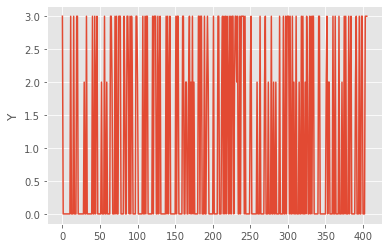

In [5]:
y_cols = ["gross", "budget"]
X_col = ["rating", "score", "genre","company"]













def main():

    DATA_PATH = "data/movies_v1.csv"
    DATA_ORIGINAL_PATH = "data/movies_original.csv"
    DATA               =  pd.read_csv(DATA_PATH)
    DATA_ORIGINAL      =  pd.read_csv(DATA_ORIGINAL_PATH)
    # ------------------------------------------------------------ #
    print("Booting up the Movie Recommended System ...")
    print (f"DATA ")
    runClustering(clean_df(DATA))

    exit()
    print("--------------------------------")
    print (f"DATA -- ORIGINAL")
    # KNN, X_test, y_test = runClustering(clean_df(DATA_ORIGINAL))









if __name__ == "__main__":
    DATA_PATH_original = "data/movies_original.csv"
    main()

    # y = df_clean[y_col[0]].to_numpy()
    # X = df_clean[X_col].to_numpy()
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
    # knn = trainCluster(X,y)
    # modelEval(knn, X_test, y_test)

# print (helper.mean(x))
